In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
df = pd.read_excel('Book1.xlsx')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,ServiceCount,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,3,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,3,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,3,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,1,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [125]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [126]:
df.describe()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,2.975011,64.761692
std,0.368612,24.559481,1.768383,30.090047
min,0.000000,0.000000,0.000000,18.250000
25%,0.000000,9.000000,1.000000,35.500000
50%,0.000000,29.000000,3.000000,70.350000
75%,0.000000,55.000000,4.000000,89.850000
max,1.000000,72.000000,7.000000,118.750000


In [127]:
df.shape

(7043, 12)

In [128]:
df.isnull().values.any()

False

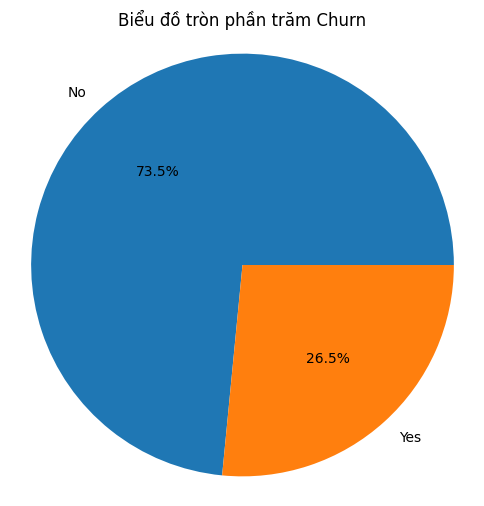

In [129]:
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels = churn_counts.index, autopct= '%1.1f%%')
plt.axis('equal')
plt.title('Biểu đồ tròn phần trăm Churn')
plt.show()


In [130]:
df.TotalCharges.values

array([29.85, 1889.5, 108.15, ..., 346.45, 306.6, 6844.5], dtype=object)

In [131]:
df[pd.to_numeric(df['TotalCharges'], errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,ServiceCount,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,4,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,1,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,5,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,2,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,5,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,1,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,2,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,1,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,1,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,6,Two year,No,Mailed check,73.35,,No


In [132]:
df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 12)

In [133]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
ServiceCount          int64
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

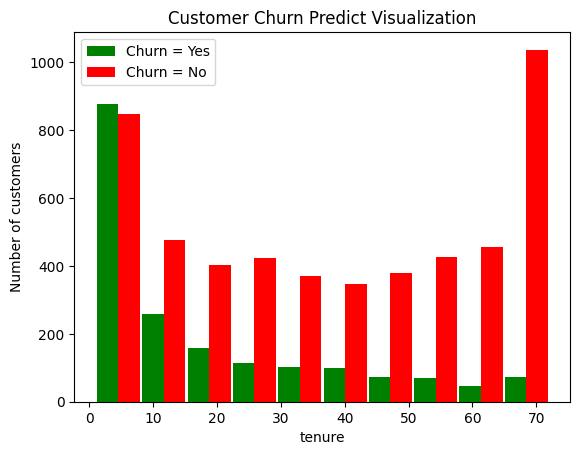

In [134]:
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure
tenure_churn_no = df1[df1.Churn == 'No'].tenure

plt.xlabel("tenure")
plt.ylabel("Number of customers")
plt.title("Customer Churn Predict Visualization")

plt.hist([tenure_churn_yes,tenure_churn_no], rwidth= 0.95, color= ['green', 'red'], label = ['Churn = Yes', 'Churn = No'])
plt.legend();

In [135]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')

df1.dtypes

C:\Users\Lechh\AppData\Local\Temp\ipykernel_13184\867381251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
ServiceCount          int64
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [136]:
def print_unique_col(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f'{col} : {df[col].unique()}')
    
print_unique_col(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [137]:
df1.replace('No phone service', 'No', inplace = True)
df1.replace('No internet service', 'No', inplace = True)

C:\Users\Lechh\AppData\Local\Temp\ipykernel_13184\2263690950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace = True)
C:\Users\Lechh\AppData\Local\Temp\ipykernel_13184\2263690950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace = True)


In [138]:
yes_no_c = ['Partner', 'Dependents','PaperlessBilling', 'Churn']
for col in yes_no_c:
    df1[col].replace({'Yes':1,'No':0}, inplace=True)

C:\Users\Lechh\AppData\Local\Temp\ipykernel_13184\72163805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0}, inplace=True)


In [139]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
ServiceCount : [1 3 4 5 2 7 6 0]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [140]:
df1['gender'].replace({'Female' : 1, 'Male' : 0}, inplace=True);

C:\Users\Lechh\AppData\Local\Temp\ipykernel_13184\721893601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female' : 1, 'Male' : 0}, inplace=True);


In [141]:
df2 = pd.get_dummies(data = df1, columns= ['Contract', 'PaymentMethod'])
df2.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'ServiceCount', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [142]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,ServiceCount,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,1,1,29.85,29.85,0,True,False,False,False,False,True,False
1,0,0,0,0,34,3,0,56.95,1889.50,0,False,True,False,False,False,False,True
2,0,0,0,0,2,3,1,53.85,108.15,1,True,False,False,False,False,False,True
3,0,0,0,0,45,3,0,42.30,1840.75,0,False,True,False,True,False,False,False
4,1,0,0,0,2,1,1,70.70,151.65,1,True,False,False,False,False,True,False


In [143]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,ServiceCount,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,1,1,0.115423,0.001275,0,True,False,False,False,False,True,False
1,0,0,0,0,0.464789,3,0,0.385075,0.215867,0,False,True,False,False,False,False,True
2,0,0,0,0,0.014085,3,1,0.354229,0.010310,1,True,False,False,False,False,False,True
3,0,0,0,0,0.619718,3,0,0.239303,0.210241,0,False,True,False,True,False,False,False
4,1,0,0,0,0.014085,1,1,0.521891,0.015330,1,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,6,1,0.662189,0.227521,0,False,True,False,False,False,False,True
7039,1,0,1,1,1.000000,5,1,0.845274,0.847461,0,False,True,False,False,True,False,False
7040,1,0,1,1,0.140845,1,1,0.112935,0.037809,0,True,False,False,False,False,True,False
7041,0,1,1,0,0.042254,2,1,0.558706,0.033210,1,True,False,False,False,False,False,True


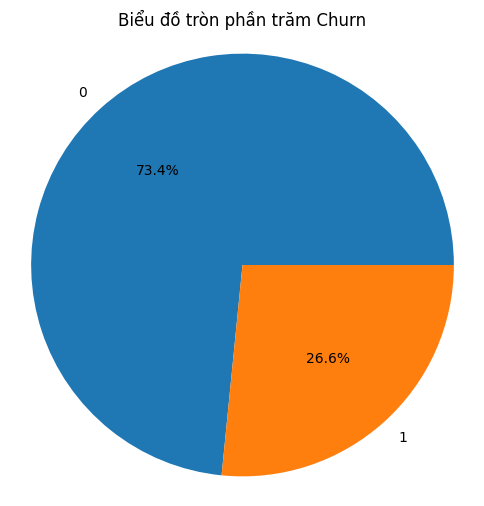

In [144]:
churn_counts = df2['Churn'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels = churn_counts.index, autopct= '%1.1f%%')
plt.axis('equal')
plt.title('Biểu đồ tròn phần trăm Churn')
plt.show()

In [145]:
for col in df2:
    print(f'{col} : {df2[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
ServiceCount : [1 3 4 5 2 7 6 0]
PaperlessBilling : [1 0]
MonthlyCharges : [0.11542289 0.38507463 0.35422886 ... 0.4

In [146]:

# Lấy các cột còn lại làm biến độc lập X
X = df2.drop(columns=['Churn'])

# Lấy cột 'Churn' đã chuyển đổi thành dạng số làm biến mục tiêu Y
Y = df2['Churn']

In [147]:
Y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2, random_state= 15, stratify= Y)

In [149]:
Y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Khởi tạo mô hình
model = LogisticRegression()

# Huấn luyện mô hình trên dữ liệu huấn luyện
model.fit(X_train, Y_train)

# Đánh giá độ chính xác trên dữ liệu kiểm tra
print(model.score(X_train, Y_train))
acc = model.score(X_test, Y_test)
print("Accuracy:", acc)

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = model.predict(X_test)
print("Predictions:", y_pred[:5])

# In báo cáo phân loại
cl_rep = classification_report(Y_test, y_pred)
print(cl_rep)

# In intercept và các hệ số của mô hình
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)




0.7994666666666667
Accuracy: 0.8073916133617626
Predictions: [0 0 0 0 1]
              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1033
           1       0.69      0.51      0.58       374

    accuracy                           0.81      1407
   macro avg       0.76      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407

Intercept: [-1.3234047]
Coefficients: [[ 0.05197122  0.21691994  0.05908486 -0.22077443 -3.15642472 -0.23252332
   0.40761662  2.60509657  1.55234173  0.57226232 -0.24040406 -1.06087932
  -0.22438257 -0.32763507  0.17156397 -0.3485674 ]]


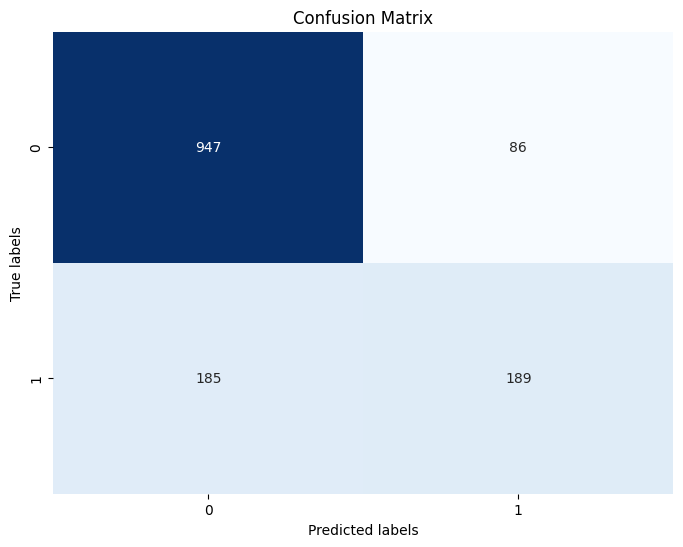

In [151]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(Y_test, y_pred):
    # Tính ma trận nhầm lẫn
    cm = confusion_matrix(Y_test, y_pred)

    # Tạo heatmap từ ma trận nhầm lẫn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()



# Vẽ ma trận nhầm lẫn
plot_confusion_matrix(Y_test, y_pred)
